# Project Description

The goal of this project is to model estimated quality of life from 2000 to 2100 based on the effects of climate change (a focus on the change in the frequency of natural disasters).

## Question

__What is the motivating question?__
How does climate change consequences affect quality of life in the future?

__What type of question is this?__
Predictive.

__Why is this an important or interesting question?__
Our question speaks to the future of humanity and the consequences of our own actions. It speaks to the lack of action we currently show towards the potential stringent living conditions in a future where climate change has reached worst case scenario, and asks us if we really want to live in a world like that.

__What will we learn by asking this question?__
By asking this question, we can begin to understand how the simple change in temperature over a long period of time will affect other factors -- such as the frequency of natural disasters -- which ultimately will affect our quality of life. As such, we would be able to visualize quality of life over time, dependent on factors that relate to climate change.

## Methodology

__How are you going to answer your proposed question?__
We will model the number of natural disasters per year to quality of life at different changes of temperature.

__What assumptions are you making? Are these good or bad assumptions?__
Some assumptions we made is that the earth will increase by 1-4C not taking into account the model from our data we collected since we are varying the graph.  We’re assuming this change in temperature is just going to happen.

__How did you develop and refine your model?__
Initially, we were going to model deaths in population as temperature increases.  However, technology advanced, warning systems, and government infrastructures all got better so people are dying less.  As a result, there was no trend between deaths and temperature increase.  Predicting calories spread over number of people decreases quality of life, not necessarily kills them, so we couldn’t model population change here either. As a result, we redefined and developped our model to the questions we have now.

__How did you set the parameters of your model?__
To set our parameters, we plotted the change in temperature from 1900-2018, and modeled it out to 2100.  Next, we found a function that relates natural disaster frequency to change in temperature and found a function that relates quality of life to natural disaster frequency.  Lastly, we plotted quality of life over time, which was dependent on input temperature model - watching the world warm by 1, 2, and 3 degrees Celsius by 2100 - which varied the natural disaster frequency which then varied the quality of life.

__How did you validate your model?__
To validate our model, we modeled quality of life on a scale of 0-10, 0 being we are all dead, and 10 being we all live fantastic lives.  The quality of life as of today should be higher than any day in the future and that is how we will validate our model.  It also should not be linear as from the of frequency vs dT graph, frequencies exponentially increase after change in 3C.

# Model

### Configuration

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library"
from modsim import *

### Change in Temperature vs. Time

In [3]:
"dT vs time"
dTvst = "tempvstime.csv" # file name
dTvst_table = pd.read_csv(dTvst) # reading in file
print(dTvst_table) #printing out the table to check it is reading the data correctly
dTvst_table.columns = ['year','dT'] # naming the columns

     1900  -0.2
0    1901 -0.24
1    1902 -0.26
2    1903 -0.29
3    1904 -0.32
4    1905 -0.35
..    ...   ...
113  2014  0.79
114  2015  0.83
115  2016  0.88
116  2017  0.92
117  2018  0.96

[118 rows x 2 columns]


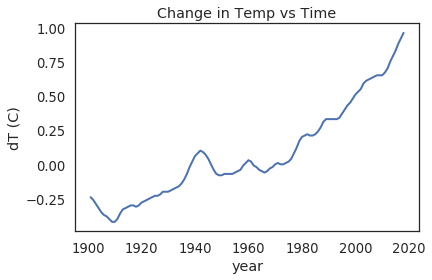

In [4]:
dT = dTvst_table['dT'] # y axis
year = dTvst_table['year'] # x axis
dTvsyear = plot(year, dT) # x,y

decorate(xlabel = 'year',
        ylabel = 'dT (C)',
        title = 'Change in Temp vs Time')

#fig.savefig('Change in Temp vs Time.png')

In [12]:
def run_sim_temp(system_temp, update_temp):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the temperature change the next year
    
    returns: TimeSeries
    """
    results_temp = TimeSeries()
    results_temp[system_temp.year_0] = -.2

    for year in linrange(system_temp.year_0, system_temp.year_end):
        results_temp[year+1] = results_temp[year] + update_temp(results_temp[year], system_temp.x_t, year)
        
    return results_temp

In [13]:
def update_temp(prev_dT, x_t, year):
    """Compute the temperature next year with a quadratic model.
    
    dT: change in temperature (C)
    year: current year
    system: system object containing parameters of the model
    
    returns: change in temps in following future years
    """
    #dT = x_t*(prev_dT**2) - 0.3047*prev_dT + 290
    dT = 2*x_t*year - 0.3047
    
    return dT

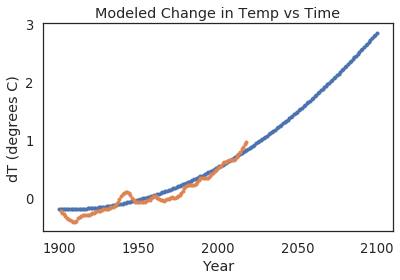

In [16]:
system_temp = System(year_0 = 1900, year_end = 2100, dT_0=-.2, x_t=0.00008)
results_temp = run_sim_temp(system_temp, update_temp)
ddTvsyear = plot(results_temp, '.') # model
#year_range = linrange(system_temp.year_0, system_temp.year_end)
#ddTvsyear = plot(year_range, update_temp(year_range, system_temp.x_t))
dTvsyear = plot(year, dT, '.') # x,y

decorate(xlabel='Year', 
         ylabel='dT (degrees C)',
         title='Modeled Change in Temp vs Time')

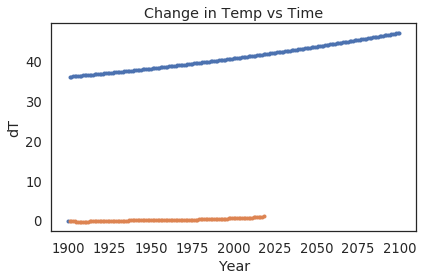

In [17]:
system_temp = System(year_0=1900, year_end=2100, x_t=0.00009)
results_temp = run_simulation_temp(system_temp, update_func_temp)
ddTvsyear = plot(results_temp, '.') # model
dTvsyear = plot(year, dT, '.') # x,y

decorate(xlabel='Year', 
         ylabel='dT',
         title='Change in Temp vs Time') 

# Graph the extrapolated temperature vs. time model
# Results say that by 2100, the world will increase by 2.93 degrees C

### Natural Disasters vs. Temperature

In [65]:
def run_simulation1(system1, update_func1):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
#     results[system1.d_temp_0] = 0
    
    print(results_temp[system_temp.year_0])
    print(results_temp[system_temp.year_end])

#     for x in linrange(results_temp[system_temp.year_0], results_temp[system_temp.year_end]):
#         results[x+1] = update_func1(results[x], x, system1)
#         print(results)
    
    for x in results_temp:
        results[x] = update_func1(x, system1)
    print(results)
    return results

In [64]:
def update_func1(d_temp, system1):
    """Compute the population next year with a quadratic model.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    f = 28.727*np.exp(4.1503*d_temp)
    
    return f

-0.2
2.898779999999931


-0.20000    1.252564e+01
-0.13000    1.674833e+01
-0.13062    1.670529e+01
-0.13108    1.667342e+01
-0.13138    1.665268e+01
                ...     
 2.77550    2.890659e+06
 2.80608    3.281828e+06
 2.83682    3.728407e+06
 2.86772    4.238567e+06
 2.89878    4.821734e+06
Length: 201, dtype: float64


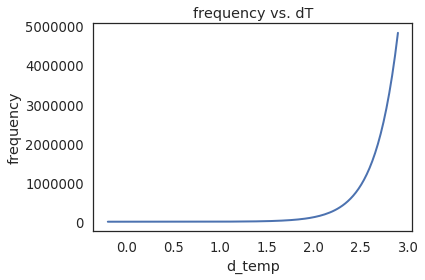

In [66]:
system1 = System(d_temp_0=0, d_temp_end=4) 
results = run_simulation1(system1, update_func1)
dfreqvsdT = plot(results) # time series created in run simulation

decorate(xlabel='d_temp', 
         ylabel='frequency',
         title='frequency vs. dT')

### Natural Disasters vs. Quality of Life

In [67]:
def run_simulation2(system2, update_func2):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results_QoL = TimeSeries()
    results_QoL[system2.d_freq_0] = 0
    
#     print(results)
#     print(results[system2.d_freq_0])
#     print(results[len(results)-1])

#     for x in linrange(results[system2.d_freq_0], results[len(results)-1]):
#         results_QoL[x+1] = update_func2(x, system2)
#         print(results_QoL)
    for x in results:
        results_QoL[x] = update_func2(x, system2)
        
    return results_QoL

In [72]:
def update_func2(d_freq, system2):
    """Compute the population next year with a quadratic model.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    QoL = 10-d_freq/2100
    
    return QoL

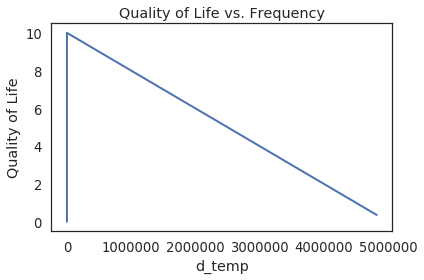

In [74]:
system2 = System(d_freq_0=0, d_freq_end=get_last_value(results))
results_QoL = run_simulation2(system2, update_func2)
dfreqvsdT = plot(results_QoL) # time series created in run simulation

decorate(xlabel='d_temp', 
         ylabel='Quality of Life',
         title='Quality of Life vs. Frequency')

### Quality of Life Overall vs. Time

1900    9.999975
1901    9.999967
1902    9.999967
1903    9.999967
1904    9.999967
          ...   
2095    4.904389
2096    4.218682
2097    3.436343
2098    2.543187
2099    1.522866
Length: 200, dtype: float64


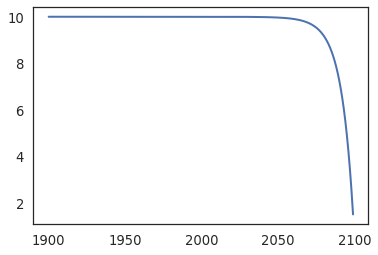

In [77]:
results_overall = TimeSeries()

for t in linrange(system_temp.year_0, system_temp.year_end):
    results_overall[t] = results_QoL[results[results_temp[t]]]
#     results_overall[t] = results_QoL[results[results_temp[t]]]
print(results_overall)
plot(results_overall)

## Results

__What results did your model generate?__
Our model generated several "outputs" in the forms of graphs:
1. Temperature vs. Time (graphed from data, and then graphed with a quadratic model projection as well)
2. Natural Disasters vs. Temperature (modeled with a function)
3. Quality of Life vs. Natural Disasters (modeled with a function)
4. Quality of Life vs. Time (Quality of Life model data graphed according to the timescale of 2000 to 2100)

The most important output is the mapping of quality of life over time (varied by temperature model input), since that is the question we set out to answer.

__What metrics did you record?__

1. Temperature (over time) [deg C]
2. Frequency of natural disasters (per temperature) [number/year]
3. Quality of Life (per natural disasters AND year) [number scale]

## Interpretation

__How do the results answer the question?__
We found that our quality of life will drastically decrease if the planet continuously warms.  If the planet warms, there are more natural disasters, and with more natural disasters, the human population becomes sadder.  The metric recorded is mapping quality of life (0-10) to change in natural disaster frequency, which we recorded over time.

__Is your answer valid? What are the limitations of your model?__
Our answer in concept should be valid, but there are a fair number of limitations to our model. For instance, take any of our functions - the one that relates temperature to time, natural disasters to temperature, etc. - and they will not be precise nor accurate enough to make this model useful in the real world. The quality of life function was a completely arbitrary - a scale set by us. If substituted for more detailed and mathematical models, this model would be more useful. Additionally, we were limited by the computing power of Jupyter notebook, simply because of the complexity of our functions and the size of the values we were working with (that's why the QoL vs. Natural Disasters graph couldn't be made - Jupyter notebook didn't have enough computing power!).